# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise ) retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Pressure" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [465]:
# Importando as bibliotecas necessárias para importação dos datasets

In [466]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")



In [467]:
# importando os dados  

In [468]:
df=pd.read_csv('airfoil.csv')

In [469]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [470]:
y=df['Pressure']

In [471]:
X=df[df.columns[0:5]]

In [472]:
X

,Frequency,Angle,Length,Velocity,Suction Side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

In [474]:
X_test

,Frequency,Angle,Length,Velocity,Suction Side
1154,1000,17.4,0.0254,71.3,0.016104
475,2500,0.0,0.1524,55.5,0.001727
458,2000,0.0,0.1524,71.3,0.001599
43,5000,0.0,0.3048,39.6,0.003101
533,2500,2.7,0.1524,39.6,0.002948
1366,1600,6.7,0.1016,39.6,0.005781
537,6300,2.7,0.1524,39.6,0.002948
273,500,2.0,0.2286,39.6,0.003466
428,800,7.3,0.2286,39.6,0.012348
381,1000,5.3,0.2286,39.6,0.006143


In [475]:
y_train

1134    128.867
600     136.023
1201    139.226
1010    134.928
829     118.955
         ...   
1427    135.674
88      122.101
892     130.430
1334    133.012
727     128.560
Name: Pressure, Length: 1472, dtype: float64

In [476]:
y_test

1154    125.816
475     127.763
458     128.647
43      117.789
533     125.589
1366    127.375
537     119.209
273     125.157
428     126.299
381     125.581
895     128.200
1085    123.894
1101    126.886
1065    134.236
366     130.460
803     134.226
1084    121.154
403     119.208
282     120.227
1210    115.857
1450    117.875
1493    118.964
370     120.330
1436    117.054
385     116.151
1125    131.808
1073    132.202
1465    118.767
97      127.564
1219    126.097
355     120.209
Name: Pressure, dtype: float64

In [477]:
#importando bibliotecas para construção da rede neural 

In [478]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [479]:
#construimos a rede neural

In [480]:
n_input = 5  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.03 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 100)               600       
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trai

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [481]:
#treinamos nossa rede por 15000 interações . Cada mini-lote terá 1/5das amostras e assim treinaremos por
# 3000 épocas ou 15000 iterações.

In [632]:
epochs = 10000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 2,
            epochs=epochs,
            verbose=0)

In [633]:
#Avaliamos a performance do modelo )

In [634]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


46/46 [==============================] - 0s 686us/step


In [635]:
y_hat_test = model.predict(X_test)


1/1 [==============================] - 0s 18ms/step


In [636]:
# métricas do treino

In [637]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [638]:
MAE_T,R2_T,RMSE_T

(2.828036765803462, 0.6787378487523443, 15.40528522050521)

In [639]:
# métricas do teste

In [640]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [641]:
MAE_t,R2_t,RMSE_t

(2.318336256457912, 0.49757761067782813, 14.330020536756654)

In [642]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

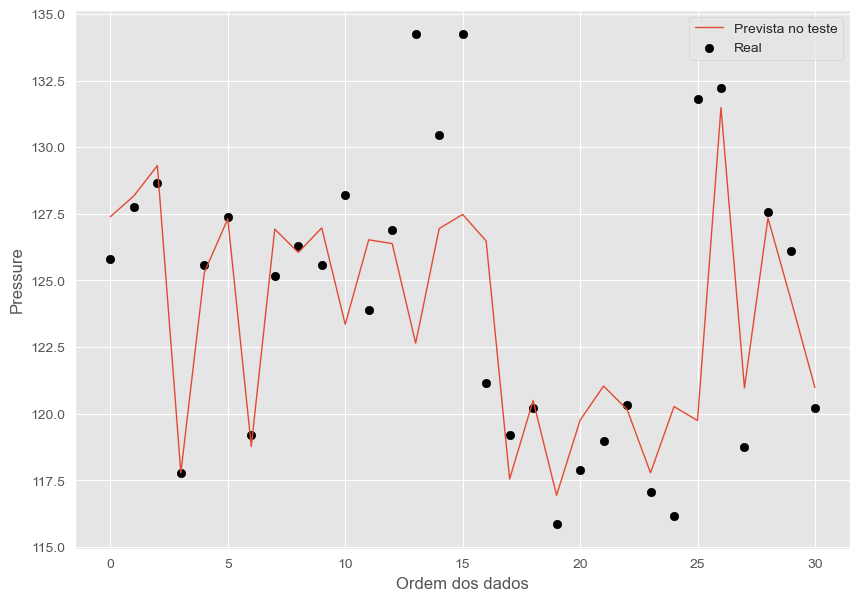

In [643]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [644]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [645]:
y_hat_mc.shape

(31, 1000)

In [646]:
# para cada amostra, foram calculados 1000 resultados com base no Dropout . Vamos ver o dataframe :

In [647]:
yhat=pd.DataFrame(y_hat_mc)

In [648]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,125.283409,128.207077,128.481049,131.255981,123.571053,129.145065,132.211548,132.713501,128.870834,132.570419,...,131.399521,131.618164,130.066147,123.877632,129.661728,130.242249,127.712784,127.827766,131.399521,129.820969
1,132.770248,128.701157,128.849854,126.245476,124.278877,125.123909,134.606583,124.796898,132.770248,123.771736,...,132.770248,127.988579,125.665184,128.782211,130.811646,128.503922,128.503860,130.248947,124.804115,127.322075
2,128.726135,133.901123,129.150665,126.901505,128.927704,130.316345,129.979431,130.380463,130.107254,128.762665,...,131.676224,127.538078,125.411781,134.015747,125.596382,131.726593,130.400131,131.914658,125.305077,130.109253
3,125.593674,117.883553,114.105980,115.828209,114.774689,114.998817,113.013939,116.620491,128.433487,119.727531,...,116.487686,119.671310,108.905151,119.026482,111.485291,116.741493,120.093941,116.536003,117.080673,113.461403
4,126.647972,132.075562,126.559639,124.590225,123.429726,132.597015,121.554939,118.287338,124.870415,125.342216,...,125.150620,125.437469,125.778618,127.378777,128.167542,127.043602,125.619606,116.294556,129.345200,130.339340
5,128.282379,130.273087,122.352867,119.223061,130.728271,128.649414,132.087006,129.544266,129.614044,125.562729,...,121.269188,129.439011,131.341690,123.148140,124.475761,133.386551,124.933662,127.626122,121.030861,127.574821
6,119.585693,122.612625,131.335068,119.170052,113.565834,110.073692,121.630585,120.830605,117.615234,120.787079,...,120.658813,115.133934,117.165268,115.347771,121.153999,115.596573,117.384216,128.067322,114.286797,120.705093
7,123.205101,129.781998,123.017952,131.769455,130.467728,128.159805,129.051804,125.793053,128.245056,130.364349,...,127.354126,122.436905,126.033791,129.687622,127.719948,129.427414,127.239258,127.335472,127.718117,134.778030
8,128.373672,121.906670,127.310814,122.393509,126.055702,124.357506,125.745766,125.168068,128.070145,124.152054,...,129.980225,128.383453,122.867920,129.980225,125.697792,125.132721,126.384880,127.659096,124.963051,119.532066
9,131.037766,122.055473,128.429199,129.672684,128.751633,130.453247,123.923653,128.713989,130.358368,129.097748,...,125.908852,123.436172,131.037766,128.659332,121.039566,125.373329,127.361801,117.560417,123.023529,129.682571


In [649]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [650]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [651]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,mean
0,125.283409,128.207077,128.481049,131.255981,123.571053,129.145065,132.211548,132.713501,128.870834,132.570419,...,131.618164,130.066147,123.877632,129.661728,130.242249,127.712784,127.827766,131.399521,129.820969,128.654587
1,132.770248,128.701157,128.849854,126.245476,124.278877,125.123909,134.606583,124.796898,132.770248,123.771736,...,127.988579,125.665184,128.782211,130.811646,128.503922,128.503860,130.248947,124.804115,127.322075,128.431549
2,128.726135,133.901123,129.150665,126.901505,128.927704,130.316345,129.979431,130.380463,130.107254,128.762665,...,127.538078,125.411781,134.015747,125.596382,131.726593,130.400131,131.914658,125.305077,130.109253,130.026108
3,125.593674,117.883553,114.105980,115.828209,114.774689,114.998817,113.013939,116.620491,128.433487,119.727531,...,119.671310,108.905151,119.026482,111.485291,116.741493,120.093941,116.536003,117.080673,113.461403,117.924294
4,126.647972,132.075562,126.559639,124.590225,123.429726,132.597015,121.554939,118.287338,124.870415,125.342216,...,125.437469,125.778618,127.378777,128.167542,127.043602,125.619606,116.294556,129.345200,130.339340,125.300041
5,128.282379,130.273087,122.352867,119.223061,130.728271,128.649414,132.087006,129.544266,129.614044,125.562729,...,129.439011,131.341690,123.148140,124.475761,133.386551,124.933662,127.626122,121.030861,127.574821,127.415359
6,119.585693,122.612625,131.335068,119.170052,113.565834,110.073692,121.630585,120.830605,117.615234,120.787079,...,115.133934,117.165268,115.347771,121.153999,115.596573,117.384216,128.067322,114.286797,120.705093,119.049065
7,123.205101,129.781998,123.017952,131.769455,130.467728,128.159805,129.051804,125.793053,128.245056,130.364349,...,122.436905,126.033791,129.687622,127.719948,129.427414,127.239258,127.335472,127.718117,134.778030,127.102310
8,128.373672,121.906670,127.310814,122.393509,126.055702,124.357506,125.745766,125.168068,128.070145,124.152054,...,128.383453,122.867920,129.980225,125.697792,125.132721,126.384880,127.659096,124.963051,119.532066,125.873955
9,131.037766,122.055473,128.429199,129.672684,128.751633,130.453247,123.923653,128.713989,130.358368,129.097748,...,123.436172,131.037766,128.659332,121.039566,125.373329,127.361801,117.560417,123.023529,129.682571,126.424500


In [652]:
#separamos novamente os 1000 resultados retitrando a coluna média 

In [653]:
yhatd=yhat.iloc[:,0:1000]

In [654]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,125.283409,128.207077,128.481049,131.255981,123.571053,129.145065,132.211548,132.713501,128.870834,132.570419,...,131.399521,131.618164,130.066147,123.877632,129.661728,130.242249,127.712784,127.827766,131.399521,129.820969
1,132.770248,128.701157,128.849854,126.245476,124.278877,125.123909,134.606583,124.796898,132.770248,123.771736,...,132.770248,127.988579,125.665184,128.782211,130.811646,128.503922,128.503860,130.248947,124.804115,127.322075
2,128.726135,133.901123,129.150665,126.901505,128.927704,130.316345,129.979431,130.380463,130.107254,128.762665,...,131.676224,127.538078,125.411781,134.015747,125.596382,131.726593,130.400131,131.914658,125.305077,130.109253
3,125.593674,117.883553,114.105980,115.828209,114.774689,114.998817,113.013939,116.620491,128.433487,119.727531,...,116.487686,119.671310,108.905151,119.026482,111.485291,116.741493,120.093941,116.536003,117.080673,113.461403
4,126.647972,132.075562,126.559639,124.590225,123.429726,132.597015,121.554939,118.287338,124.870415,125.342216,...,125.150620,125.437469,125.778618,127.378777,128.167542,127.043602,125.619606,116.294556,129.345200,130.339340
5,128.282379,130.273087,122.352867,119.223061,130.728271,128.649414,132.087006,129.544266,129.614044,125.562729,...,121.269188,129.439011,131.341690,123.148140,124.475761,133.386551,124.933662,127.626122,121.030861,127.574821
6,119.585693,122.612625,131.335068,119.170052,113.565834,110.073692,121.630585,120.830605,117.615234,120.787079,...,120.658813,115.133934,117.165268,115.347771,121.153999,115.596573,117.384216,128.067322,114.286797,120.705093
7,123.205101,129.781998,123.017952,131.769455,130.467728,128.159805,129.051804,125.793053,128.245056,130.364349,...,127.354126,122.436905,126.033791,129.687622,127.719948,129.427414,127.239258,127.335472,127.718117,134.778030
8,128.373672,121.906670,127.310814,122.393509,126.055702,124.357506,125.745766,125.168068,128.070145,124.152054,...,129.980225,128.383453,122.867920,129.980225,125.697792,125.132721,126.384880,127.659096,124.963051,119.532066
9,131.037766,122.055473,128.429199,129.672684,128.751633,130.453247,123.923653,128.713989,130.358368,129.097748,...,125.908852,123.436172,131.037766,128.659332,121.039566,125.373329,127.361801,117.560417,123.023529,129.682571


In [655]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [656]:
yhatd['2*std']=yhatd.apply(np.std,axis=1)

In [657]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,2*std
0,125.283409,128.207077,128.481049,131.255981,123.571053,129.145065,132.211548,132.713501,128.870834,132.570419,...,131.618164,130.066147,123.877632,129.661728,130.242249,127.712784,127.827766,131.399521,129.820969,3.514879
1,132.770248,128.701157,128.849854,126.245476,124.278877,125.123909,134.606583,124.796898,132.770248,123.771736,...,127.988579,125.665184,128.782211,130.811646,128.503922,128.503860,130.248947,124.804115,127.322075,3.565083
2,128.726135,133.901123,129.150665,126.901505,128.927704,130.316345,129.979431,130.380463,130.107254,128.762665,...,127.538078,125.411781,134.015747,125.596382,131.726593,130.400131,131.914658,125.305077,130.109253,3.501784
3,125.593674,117.883553,114.105980,115.828209,114.774689,114.998817,113.013939,116.620491,128.433487,119.727531,...,119.671310,108.905151,119.026482,111.485291,116.741493,120.093941,116.536003,117.080673,113.461403,4.082484
4,126.647972,132.075562,126.559639,124.590225,123.429726,132.597015,121.554939,118.287338,124.870415,125.342216,...,125.437469,125.778618,127.378777,128.167542,127.043602,125.619606,116.294556,129.345200,130.339340,3.788094
5,128.282379,130.273087,122.352867,119.223061,130.728271,128.649414,132.087006,129.544266,129.614044,125.562729,...,129.439011,131.341690,123.148140,124.475761,133.386551,124.933662,127.626122,121.030861,127.574821,3.716748
6,119.585693,122.612625,131.335068,119.170052,113.565834,110.073692,121.630585,120.830605,117.615234,120.787079,...,115.133934,117.165268,115.347771,121.153999,115.596573,117.384216,128.067322,114.286797,120.705093,4.227846
7,123.205101,129.781998,123.017952,131.769455,130.467728,128.159805,129.051804,125.793053,128.245056,130.364349,...,122.436905,126.033791,129.687622,127.719948,129.427414,127.239258,127.335472,127.718117,134.778030,3.510187
8,128.373672,121.906670,127.310814,122.393509,126.055702,124.357506,125.745766,125.168068,128.070145,124.152054,...,128.383453,122.867920,129.980225,125.697792,125.132721,126.384880,127.659096,124.963051,119.532066,3.515072
9,131.037766,122.055473,128.429199,129.672684,128.751633,130.453247,123.923653,128.713989,130.358368,129.097748,...,123.436172,131.037766,128.659332,121.039566,125.373329,127.361801,117.560417,123.023529,129.682571,3.724270


In [658]:
#Abaixo os valores reais para y do conjunto de teste

In [659]:
y_test=pd.DataFrame(y_test)

In [660]:
y_test

,Pressure
0,125.816
1,127.763
2,128.647
3,117.789
4,125.589
5,127.375
6,119.209
7,125.157
8,126.299
9,125.581


In [661]:
#resetando o índice 

In [662]:
y_test=y_test.reset_index(drop=True)

In [663]:
y_test

,Pressure
0,125.816
1,127.763
2,128.647
3,117.789
4,125.589
5,127.375
6,119.209
7,125.157
8,126.299
9,125.581


In [664]:
#retirado a coluna 0

In [665]:
mean=yhat.iloc[:,1000]

In [666]:
mean=pd.DataFrame(mean)

In [667]:
mean

,mean
0,128.654587
1,128.431549
2,130.026108
3,117.924294
4,125.300041
5,127.415359
6,119.049065
7,127.102310
8,125.873955
9,126.424500


In [668]:
desvpad=yhatd.iloc[:,1000]

In [669]:
desvpad=2*pd.DataFrame(desvpad)

In [670]:
desvpad

,2*std
0,7.029757
1,7.130166
2,7.003568
3,8.164968
4,7.576188
5,7.433495
6,8.455692
7,7.020373
8,7.030145
9,7.448540


In [671]:
#colocar tudo em uma tabela

In [672]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

In [673]:
df.resume

,Pressure,mean,2*std
0,125.816,128.654587,7.029757
1,127.763,128.431549,7.130166
2,128.647,130.026108,7.003568
3,117.789,117.924294,8.164968
4,125.589,125.300041,7.576188
5,127.375,127.415359,7.433495
6,119.209,119.049065,8.455692
7,125.157,127.102310,7.020373
8,126.299,125.873955,7.030145
9,125.581,126.424500,7.448540


In [674]:
df.resume['Ulow']=df.resume['mean']-df.resume['2*std']

In [675]:
df.resume['Uup']=df.resume['mean'] + df.resume['2*std']

In [676]:
df.resume

,Pressure,mean,2*std,Ulow,Uup
0,125.816,128.654587,7.029757,121.624830,135.684344
1,127.763,128.431549,7.130166,121.301383,135.561715
2,128.647,130.026108,7.003568,123.022540,137.029675
3,117.789,117.924294,8.164968,109.759325,126.089262
4,125.589,125.300041,7.576188,117.723854,132.876229
5,127.375,127.415359,7.433495,119.981864,134.848855
6,119.209,119.049065,8.455692,110.593372,127.504757
7,125.157,127.102310,7.020373,120.081937,134.122684
8,126.299,125.873955,7.030145,118.843810,132.904099
9,125.581,126.424500,7.448540,118.975960,133.873039


In [677]:
    df.resume.rename(columns={'Pressure ':'y_real'},inplace=True)  

In [678]:
df.resume

,Pressure,mean,2*std,Ulow,Uup
0,125.816,128.654587,7.029757,121.624830,135.684344
1,127.763,128.431549,7.130166,121.301383,135.561715
2,128.647,130.026108,7.003568,123.022540,137.029675
3,117.789,117.924294,8.164968,109.759325,126.089262
4,125.589,125.300041,7.576188,117.723854,132.876229
5,127.375,127.415359,7.433495,119.981864,134.848855
6,119.209,119.049065,8.455692,110.593372,127.504757
7,125.157,127.102310,7.020373,120.081937,134.122684
8,126.299,125.873955,7.030145,118.843810,132.904099
9,125.581,126.424500,7.448540,118.975960,133.873039


In [679]:
df.resume['erro']=abs(df.resume['Pressure']-df.resume['mean'])

In [680]:
df.resume

,Pressure,mean,2*std,Ulow,Uup,erro
0,125.816,128.654587,7.029757,121.624830,135.684344,2.838587
1,127.763,128.431549,7.130166,121.301383,135.561715,0.668549
2,128.647,130.026108,7.003568,123.022540,137.029675,1.379108
3,117.789,117.924294,8.164968,109.759325,126.089262,0.135294
4,125.589,125.300041,7.576188,117.723854,132.876229,0.288959
5,127.375,127.415359,7.433495,119.981864,134.848855,0.040359
6,119.209,119.049065,8.455692,110.593372,127.504757,0.159935
7,125.157,127.102310,7.020373,120.081937,134.122684,1.945310
8,126.299,125.873955,7.030145,118.843810,132.904099,0.425045
9,125.581,126.424500,7.448540,118.975960,133.873039,0.843500


In [681]:
df.resume.to_csv('df.resume.csv')

In [682]:
#verificar um valor predito : média e desvio padrão 

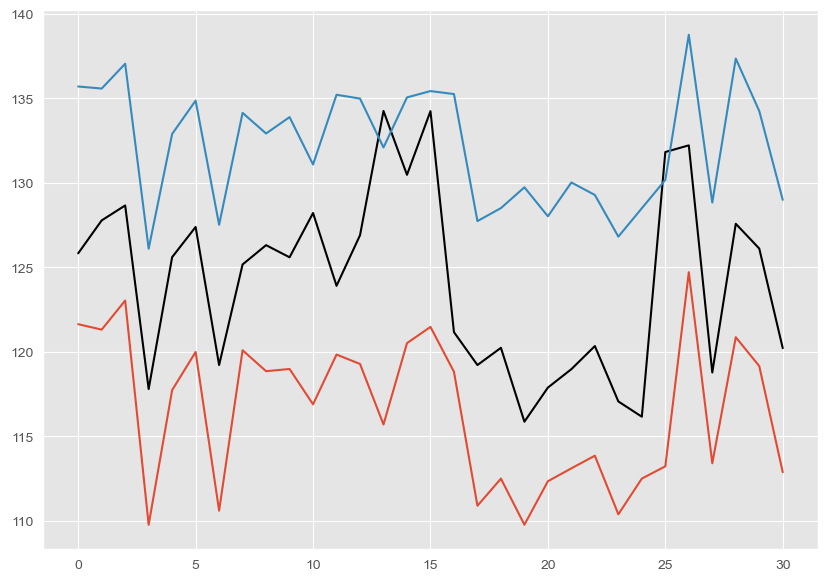

In [683]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.plot(df.resume['Pressure'],color='black')
plt.plot(df.resume['Ulow'])
plt.plot(df.resume['Uup'])






plt.show()

In [684]:
yt=np.array(y_test)

In [685]:
yt[0]

array([125.816])

In [686]:
np.mean(y_hat_mc[0])

128.6546

In [687]:
np.sqrt(np.var(y_hat_mc[0]))

3.5148757

In [688]:
#Computamos média e variância para cada ponto no set de teste.

In [689]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [690]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

2.3710994617092997

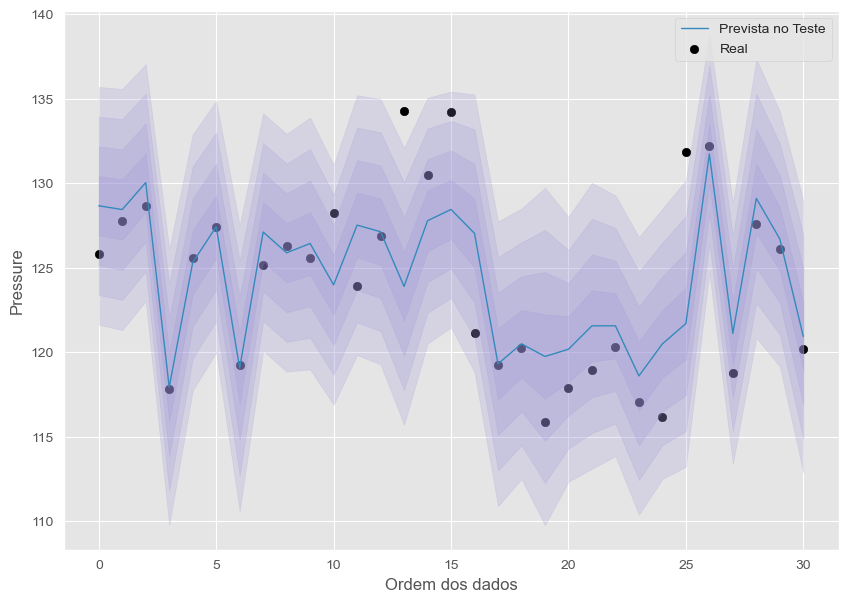

In [691]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [692]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [693]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

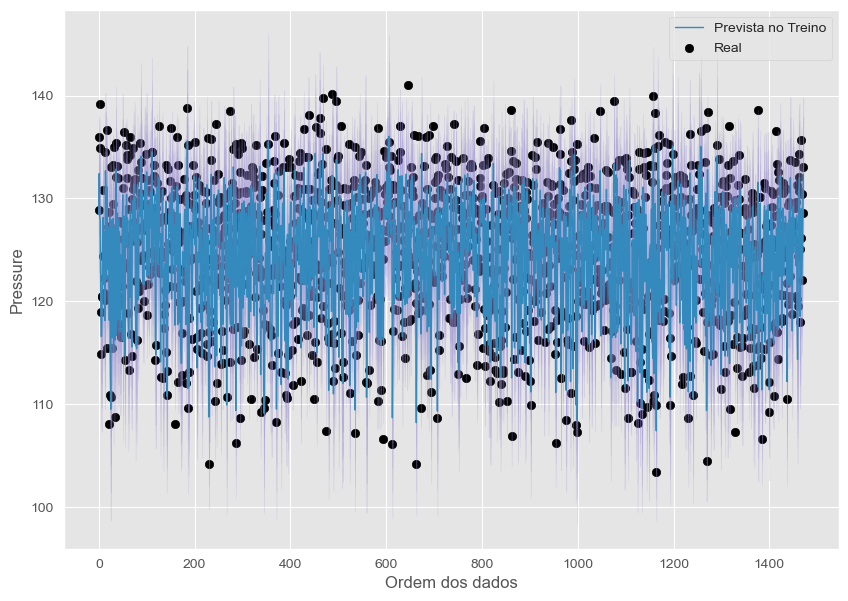

In [694]:
n = 1472
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()

In [695]:
model

In [807]:
X_test=X_test.reset_index(drop=True)

In [808]:
X_test

,Frequency,Angle,Length,Velocity,Suction Side
0,1000,17.4,0.0254,71.3,0.016104
1,2500,0.0,0.1524,55.5,0.001727
2,2000,0.0,0.1524,71.3,0.001599
3,5000,0.0,0.3048,39.6,0.003101
4,2500,2.7,0.1524,39.6,0.002948
5,1600,6.7,0.1016,39.6,0.005781
6,6300,2.7,0.1524,39.6,0.002948
7,500,2.0,0.2286,39.6,0.003466
8,800,7.3,0.2286,39.6,0.012348
9,1000,5.3,0.2286,39.6,0.006143


In [809]:

 previsão=model.predict(X_test[:31])


1/1 [==============================] - 0s 18ms/step


In [810]:
colnames=["Predict"]

In [811]:
previsão1=pd.DataFrame(previsão, columns=colnames)

In [812]:
previsão1

,Predict
0,127.391876
1,128.171539
2,129.308350
3,117.782959
4,125.298454
5,127.312447
6,118.776360
7,126.924522
8,126.050499
9,126.971077


In [813]:
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)

In [814]:
df.resume3

,Frequency,Angle,Length,Velocity,Suction Side,Pressure,Predict
0,1000,17.4,0.0254,71.3,0.016104,125.816,127.391876
1,2500,0.0,0.1524,55.5,0.001727,127.763,128.171539
2,2000,0.0,0.1524,71.3,0.001599,128.647,129.308350
3,5000,0.0,0.3048,39.6,0.003101,117.789,117.782959
4,2500,2.7,0.1524,39.6,0.002948,125.589,125.298454
5,1600,6.7,0.1016,39.6,0.005781,127.375,127.312447
6,6300,2.7,0.1524,39.6,0.002948,119.209,118.776360
7,500,2.0,0.2286,39.6,0.003466,125.157,126.924522
8,800,7.3,0.2286,39.6,0.012348,126.299,126.050499
9,1000,5.3,0.2286,39.6,0.006143,125.581,126.971077


In [890]:
#criar a coluna de predict delta x1 

In [891]:
#incerteza de x1 (medidor de frequência)

In [892]:
ux1=0.00001

In [893]:
deltax1=X_test[:31]+np.array([ux1,0,0,0,0])

In [894]:
deltax1

,Frequency,Angle,Length,Velocity,Suction Side
0,1000.00001,17.4,0.0254,71.3,0.016104
1,2500.00001,0.0,0.1524,55.5,0.001727
2,2000.00001,0.0,0.1524,71.3,0.001599
3,5000.00001,0.0,0.3048,39.6,0.003101
4,2500.00001,2.7,0.1524,39.6,0.002948
5,1600.00001,6.7,0.1016,39.6,0.005781
6,6300.00001,2.7,0.1524,39.6,0.002948
7,500.00001,2.0,0.2286,39.6,0.003466
8,800.00001,7.3,0.2286,39.6,0.012348
9,1000.00001,5.3,0.2286,39.6,0.006143


In [895]:
previsãodeltax1=model.predict(deltax1[:31])


1/1 [==============================] - 0s 18ms/step


In [896]:
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

In [897]:
#criar a coluna de predict delta x2

In [898]:
#incerteza de x2 (medidor de ângulo)

In [899]:
ux2=0.00001

In [900]:
deltax2=X_test[:31]+np.array([0,ux2,0,0,0])

In [901]:
deltax2

,Frequency,Angle,Length,Velocity,Suction Side
0,1000.0,17.40001,0.0254,71.3,0.016104
1,2500.0,0.00001,0.1524,55.5,0.001727
2,2000.0,0.00001,0.1524,71.3,0.001599
3,5000.0,0.00001,0.3048,39.6,0.003101
4,2500.0,2.70001,0.1524,39.6,0.002948
5,1600.0,6.70001,0.1016,39.6,0.005781
6,6300.0,2.70001,0.1524,39.6,0.002948
7,500.0,2.00001,0.2286,39.6,0.003466
8,800.0,7.30001,0.2286,39.6,0.012348
9,1000.0,5.30001,0.2286,39.6,0.006143


In [902]:
previsãodeltax2=model.predict(deltax2[:31])

1/1 [==============================] - 0s 19ms/step


In [903]:
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

In [904]:
#criar a coluna de predict delta x3

In [905]:
#incerteza de x3 (medidor de comprimento)

In [906]:
ux3=0.00001

In [907]:
deltax3=X_test[:31]+np.array([0,0,ux3,0,0])

In [908]:
deltax3

,Frequency,Angle,Length,Velocity,Suction Side
0,1000.0,17.4,0.02541,71.3,0.016104
1,2500.0,0.0,0.15241,55.5,0.001727
2,2000.0,0.0,0.15241,71.3,0.001599
3,5000.0,0.0,0.30481,39.6,0.003101
4,2500.0,2.7,0.15241,39.6,0.002948
5,1600.0,6.7,0.10161,39.6,0.005781
6,6300.0,2.7,0.15241,39.6,0.002948
7,500.0,2.0,0.22861,39.6,0.003466
8,800.0,7.3,0.22861,39.6,0.012348
9,1000.0,5.3,0.22861,39.6,0.006143


In [909]:
previsãodeltax3=model.predict(deltax3[:31])

1/1 [==============================] - 0s 22ms/step


In [910]:
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

In [911]:
#criar a coluna de predict delta x4

In [912]:
#incerteza de x4 (medidor de velocidade).

In [913]:
ux4=0.00001

In [914]:
deltax4=X_test[:31]+np.array([0,0,0,ux4,0])

In [915]:
deltax4

,Frequency,Angle,Length,Velocity,Suction Side
0,1000.0,17.4,0.0254,71.30001,0.016104
1,2500.0,0.0,0.1524,55.50001,0.001727
2,2000.0,0.0,0.1524,71.30001,0.001599
3,5000.0,0.0,0.3048,39.60001,0.003101
4,2500.0,2.7,0.1524,39.60001,0.002948
5,1600.0,6.7,0.1016,39.60001,0.005781
6,6300.0,2.7,0.1524,39.60001,0.002948
7,500.0,2.0,0.2286,39.60001,0.003466
8,800.0,7.3,0.2286,39.60001,0.012348
9,1000.0,5.3,0.2286,39.60001,0.006143


In [916]:
previsãodeltax4=model.predict(deltax4[:31])

1/1 [==============================] - 0s 15ms/step


In [917]:
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)

In [918]:
#criar a coluna de predict delta x5

In [919]:
#incerteza de x5 (medidor de sucção)

In [920]:
ux5=0.00001

In [921]:
deltax5=X_test[:31]+np.array([0,0,0,0,ux5])

In [922]:
deltax5

,Frequency,Angle,Length,Velocity,Suction Side
0,1000.0,17.4,0.0254,71.3,0.016114
1,2500.0,0.0,0.1524,55.5,0.001737
2,2000.0,0.0,0.1524,71.3,0.001609
3,5000.0,0.0,0.3048,39.6,0.003111
4,2500.0,2.7,0.1524,39.6,0.002958
5,1600.0,6.7,0.1016,39.6,0.005791
6,6300.0,2.7,0.1524,39.6,0.002958
7,500.0,2.0,0.2286,39.6,0.003476
8,800.0,7.3,0.2286,39.6,0.012358
9,1000.0,5.3,0.2286,39.6,0.006153


In [923]:
previsãodeltax5=model.predict(deltax5[:31])

1/1 [==============================] - 0s 15ms/step


In [924]:
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

In [925]:
df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

In [926]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994


In [927]:
df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/ux1


In [928]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0


In [929]:
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/ux2


In [930]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0,-1.525879
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0,0.000000
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0,0.000000
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0,-1.525879
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0,-1.525879
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0,-1.525879
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0,-1.525879
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0,0.762939
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0,-1.525879
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0,-0.762939


In [931]:
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/ux3

In [932]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0,-1.525879,-42.724609
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0,0.000000,-19.836426
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0,0.000000,-21.362305
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0,-1.525879,-42.724609
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0,-1.525879,-32.043457
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0,-1.525879,-35.095215
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0,-1.525879,-37.384033
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0,0.762939,9.155273
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0,-1.525879,-40.435791
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0,-0.762939,-38.909912


In [933]:
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/ux4

In [934]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0,-1.525879,-42.724609,0.000000
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0,0.000000,-19.836426,0.000000
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0,0.000000,-21.362305,0.000000
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0,-1.525879,-42.724609,-0.762939
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0,-1.525879,-32.043457,-0.762939
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0,-1.525879,-35.095215,0.000000
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0,-1.525879,-37.384033,-0.762939
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0,0.762939,9.155273,0.000000
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0,-1.525879,-40.435791,-0.762939
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0,-0.762939,-38.909912,0.000000


In [935]:
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/ux5

In [936]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0,-1.525879,-42.724609,0.000000,-112.152100
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0,0.000000,-19.836426,0.000000,-57.983398
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0,0.000000,-21.362305,0.000000,-56.457520
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0,-1.525879,-42.724609,-0.762939,-117.492676
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0,-1.525879,-32.043457,-0.762939,-85.449219
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0,-1.525879,-35.095215,0.000000,-95.367432
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0,-1.525879,-37.384033,-0.762939,-97.656250
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0,0.762939,9.155273,0.000000,-7.629395
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0,-1.525879,-40.435791,-0.762939,-111.389160
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0,-0.762939,-38.909912,0.000000,-108.337402


In [937]:
#cálculo da incerteza combinada : incerteza de x1 a x5  desvio padrão do erro sistemático
#x1: medidor de frequencia sonora.10%
#x2: medidor de angulo : 10%
#x3: medidor de comprimento 
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 15% do resultado . Como a velocidade média é em torno de 40 m/s estimou-se em +-6m/s²
#x5: medidor de sucção 10%
#y: pressão somora: 10%
 

In [938]:
upx1=10
upx2=0.5
upx3=0.02
upx4=8
upx5=0.005
upy=5

In [939]:
df.total['uc']=2*((df.total['c1']*upx1)**2+(df.total['c2']*upx2)**2+(df.total['c3']*upx3)**2+(df.total['c4']*upx4)**2
                +(df.total['c5']*upx5)**2+(upy)**2)**0.5

In [940]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0,-1.525879,-42.724609,0.000000,-112.152100,10.320210
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0,0.000000,-19.836426,0.000000,-57.983398,10.048173
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0,0.000000,-21.362305,0.000000,-56.457520,10.052308
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0,-1.525879,-42.724609,-0.762939,-117.492676,15.988777
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0,-1.525879,-32.043457,-0.762939,-85.449219,15.928369
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0,-1.525879,-35.095215,0.000000,-95.367432,10.257118
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0,-1.525879,-37.384033,-0.762939,-97.656250,15.953987
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0,0.762939,9.155273,0.000000,-7.629395,10.036036
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0,-1.525879,-40.435791,-0.762939,-111.389160,15.974879
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0,-0.762939,-38.909912,0.000000,-108.337402,10.206770


In [941]:
df.total['erro de predição']=(df.total['Predict']-df.total['Pressure'])

In [942]:
df.total


,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,erro de predição
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0,-1.525879,-42.724609,0.000000,-112.152100,10.320210,1.575876
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0,0.000000,-19.836426,0.000000,-57.983398,10.048173,0.408539
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0,0.000000,-21.362305,0.000000,-56.457520,10.052308,0.661350
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0,-1.525879,-42.724609,-0.762939,-117.492676,15.988777,-0.006041
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0,-1.525879,-32.043457,-0.762939,-85.449219,15.928369,-0.290546
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0,-1.525879,-35.095215,0.000000,-95.367432,10.257118,-0.062553
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0,-1.525879,-37.384033,-0.762939,-97.656250,15.953987,-0.432640
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0,0.762939,9.155273,0.000000,-7.629395,10.036036,1.767522
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0,-1.525879,-40.435791,-0.762939,-111.389160,15.974879,-0.248501
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0,-0.762939,-38.909912,0.000000,-108.337402,10.206770,1.390077


In [943]:
df.total['erro de predição'].describe()

count    31.000000
mean     -0.582273
std       3.802281
min     -12.063936
25%      -0.610826
50%      -0.006041
75%       1.482977
max       5.328307
Name: erro de predição, dtype: float64

In [944]:
es=df.total.loc[:,'erro de predição'].mean()

In [945]:
es

-0.5822731185420856

In [946]:
ea=df.total.loc[:,'erro de predição'].std()

In [947]:
ea

3.8022814866760277

In [948]:
df.total['ucc']=2*((df.total['c1']*upx1)**2+(df.total['c2']*upx2)**2+(df.total['c3']*upx3)**2+(df.total['c4']*upx4)**2
                +(df.total['c5']*upx5)**2+(upy)**2+(ea)**2)**0.5+abs(es)

In [949]:
df.total

,Pressure,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,erro de predição,ucc
0,125.816,127.391876,127.391876,127.391861,127.391449,127.391876,127.390755,0.0,-1.525879,-42.724609,0.000000,-112.152100,10.320210,1.575876,13.401639
1,127.763,128.171539,128.171539,128.171539,128.171341,128.171539,128.170959,0.0,0.000000,-19.836426,0.000000,-57.983398,10.048173,0.408539,13.183669
2,128.647,129.308350,129.308350,129.308350,129.308136,129.308350,129.307785,0.0,0.000000,-21.362305,0.000000,-56.457520,10.052308,0.661350,13.186966
3,117.789,117.782959,117.782959,117.782944,117.782532,117.782951,117.781784,0.0,-1.525879,-42.724609,-0.762939,-117.492676,15.988777,-0.006041,18.287369
4,125.589,125.298454,125.298454,125.298439,125.298134,125.298447,125.297600,0.0,-1.525879,-32.043457,-0.762939,-85.449219,15.928369,-0.290546,18.232834
5,127.375,127.312447,127.312447,127.312431,127.312096,127.312447,127.311493,0.0,-1.525879,-35.095215,0.000000,-95.367432,10.257118,-0.062553,13.350902
6,119.209,118.776360,118.776360,118.776344,118.775986,118.776352,118.775383,0.0,-1.525879,-37.384033,-0.762939,-97.656250,15.953987,-0.432640,18.255957
7,125.157,126.924522,126.924522,126.924530,126.924614,126.924522,126.924446,0.0,0.762939,9.155273,0.000000,-7.629395,10.036036,1.767522,13.173993
8,126.299,126.050499,126.050499,126.050484,126.050095,126.050491,126.049385,0.0,-1.525879,-40.435791,-0.762939,-111.389160,15.974879,-0.248501,18.274818
9,125.581,126.971077,126.971077,126.971069,126.970688,126.971077,126.969994,0.0,-0.762939,-38.909912,0.000000,-108.337402,10.206770,1.390077,13.310491


In [950]:
dfb=df.total.drop(['Predict Deltax1','Predict Deltax2','Predict Deltax3','Predict Deltax4','Predict Deltax5','uc'],axis=1)

In [951]:
dfb

,Pressure,Predict,c1,c2,c3,c4,c5,erro de predição,ucc
0,125.816,127.391876,0.0,-1.525879,-42.724609,0.000000,-112.152100,1.575876,13.401639
1,127.763,128.171539,0.0,0.000000,-19.836426,0.000000,-57.983398,0.408539,13.183669
2,128.647,129.308350,0.0,0.000000,-21.362305,0.000000,-56.457520,0.661350,13.186966
3,117.789,117.782959,0.0,-1.525879,-42.724609,-0.762939,-117.492676,-0.006041,18.287369
4,125.589,125.298454,0.0,-1.525879,-32.043457,-0.762939,-85.449219,-0.290546,18.232834
5,127.375,127.312447,0.0,-1.525879,-35.095215,0.000000,-95.367432,-0.062553,13.350902
6,119.209,118.776360,0.0,-1.525879,-37.384033,-0.762939,-97.656250,-0.432640,18.255957
7,125.157,126.924522,0.0,0.762939,9.155273,0.000000,-7.629395,1.767522,13.173993
8,126.299,126.050499,0.0,-1.525879,-40.435791,-0.762939,-111.389160,-0.248501,18.274818
9,125.581,126.971077,0.0,-0.762939,-38.909912,0.000000,-108.337402,1.390077,13.310491


In [952]:
dfb['contribuição x1']=df.total['c1']*upx1

In [953]:
dfb

,Pressure,Predict,c1,c2,c3,c4,c5,erro de predição,ucc,contribuição x1
0,125.816,127.391876,0.0,-1.525879,-42.724609,0.000000,-112.152100,1.575876,13.401639,0.0
1,127.763,128.171539,0.0,0.000000,-19.836426,0.000000,-57.983398,0.408539,13.183669,0.0
2,128.647,129.308350,0.0,0.000000,-21.362305,0.000000,-56.457520,0.661350,13.186966,0.0
3,117.789,117.782959,0.0,-1.525879,-42.724609,-0.762939,-117.492676,-0.006041,18.287369,0.0
4,125.589,125.298454,0.0,-1.525879,-32.043457,-0.762939,-85.449219,-0.290546,18.232834,0.0
5,127.375,127.312447,0.0,-1.525879,-35.095215,0.000000,-95.367432,-0.062553,13.350902,0.0
6,119.209,118.776360,0.0,-1.525879,-37.384033,-0.762939,-97.656250,-0.432640,18.255957,0.0
7,125.157,126.924522,0.0,0.762939,9.155273,0.000000,-7.629395,1.767522,13.173993,0.0
8,126.299,126.050499,0.0,-1.525879,-40.435791,-0.762939,-111.389160,-0.248501,18.274818,0.0
9,125.581,126.971077,0.0,-0.762939,-38.909912,0.000000,-108.337402,1.390077,13.310491,0.0


In [954]:
dfb['contribuição x2']=df.total['c2']*upx2

In [955]:
dfb['contribuição x3']=df.total['c3']*upx3

In [956]:
dfb['contribuição x4']=df.total['c4']*upx4

In [957]:
dfb['contribuição x5']=df.total['c5']*upx5

In [958]:
dfb

,Pressure,Predict,c1,c2,c3,c4,c5,erro de predição,ucc,contribuição x1,contribuição x2,contribuição x3,contribuição x4,contribuição x5
0,125.816,127.391876,0.0,-1.525879,-42.724609,0.000000,-112.152100,1.575876,13.401639,0.0,-0.762939,-0.854492,0.000000,-0.560760
1,127.763,128.171539,0.0,0.000000,-19.836426,0.000000,-57.983398,0.408539,13.183669,0.0,0.000000,-0.396729,0.000000,-0.289917
2,128.647,129.308350,0.0,0.000000,-21.362305,0.000000,-56.457520,0.661350,13.186966,0.0,0.000000,-0.427246,0.000000,-0.282288
3,117.789,117.782959,0.0,-1.525879,-42.724609,-0.762939,-117.492676,-0.006041,18.287369,0.0,-0.762939,-0.854492,-6.103516,-0.587463
4,125.589,125.298454,0.0,-1.525879,-32.043457,-0.762939,-85.449219,-0.290546,18.232834,0.0,-0.762939,-0.640869,-6.103516,-0.427246
5,127.375,127.312447,0.0,-1.525879,-35.095215,0.000000,-95.367432,-0.062553,13.350902,0.0,-0.762939,-0.701904,0.000000,-0.476837
6,119.209,118.776360,0.0,-1.525879,-37.384033,-0.762939,-97.656250,-0.432640,18.255957,0.0,-0.762939,-0.747681,-6.103516,-0.488281
7,125.157,126.924522,0.0,0.762939,9.155273,0.000000,-7.629395,1.767522,13.173993,0.0,0.381470,0.183105,0.000000,-0.038147
8,126.299,126.050499,0.0,-1.525879,-40.435791,-0.762939,-111.389160,-0.248501,18.274818,0.0,-0.762939,-0.808716,-6.103516,-0.556946
9,125.581,126.971077,0.0,-0.762939,-38.909912,0.000000,-108.337402,1.390077,13.310491,0.0,-0.381470,-0.778198,0.000000,-0.541687


In [959]:
dfb=dfb[['Pressure','Predict','c1','c2','c3','c4','c5','contribuição x1','contribuição x2','contribuição x3','contribuição x4',
        'contribuição x5','erro de predição','ucc']]

In [960]:
dfb

,Pressure,Predict,c1,c2,c3,c4,c5,contribuição x1,contribuição x2,contribuição x3,contribuição x4,contribuição x5,erro de predição,ucc
0,125.816,127.391876,0.0,-1.525879,-42.724609,0.000000,-112.152100,0.0,-0.762939,-0.854492,0.000000,-0.560760,1.575876,13.401639
1,127.763,128.171539,0.0,0.000000,-19.836426,0.000000,-57.983398,0.0,0.000000,-0.396729,0.000000,-0.289917,0.408539,13.183669
2,128.647,129.308350,0.0,0.000000,-21.362305,0.000000,-56.457520,0.0,0.000000,-0.427246,0.000000,-0.282288,0.661350,13.186966
3,117.789,117.782959,0.0,-1.525879,-42.724609,-0.762939,-117.492676,0.0,-0.762939,-0.854492,-6.103516,-0.587463,-0.006041,18.287369
4,125.589,125.298454,0.0,-1.525879,-32.043457,-0.762939,-85.449219,0.0,-0.762939,-0.640869,-6.103516,-0.427246,-0.290546,18.232834
5,127.375,127.312447,0.0,-1.525879,-35.095215,0.000000,-95.367432,0.0,-0.762939,-0.701904,0.000000,-0.476837,-0.062553,13.350902
6,119.209,118.776360,0.0,-1.525879,-37.384033,-0.762939,-97.656250,0.0,-0.762939,-0.747681,-6.103516,-0.488281,-0.432640,18.255957
7,125.157,126.924522,0.0,0.762939,9.155273,0.000000,-7.629395,0.0,0.381470,0.183105,0.000000,-0.038147,1.767522,13.173993
8,126.299,126.050499,0.0,-1.525879,-40.435791,-0.762939,-111.389160,0.0,-0.762939,-0.808716,-6.103516,-0.556946,-0.248501,18.274818
9,125.581,126.971077,0.0,-0.762939,-38.909912,0.000000,-108.337402,0.0,-0.381470,-0.778198,0.000000,-0.541687,1.390077,13.310491


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


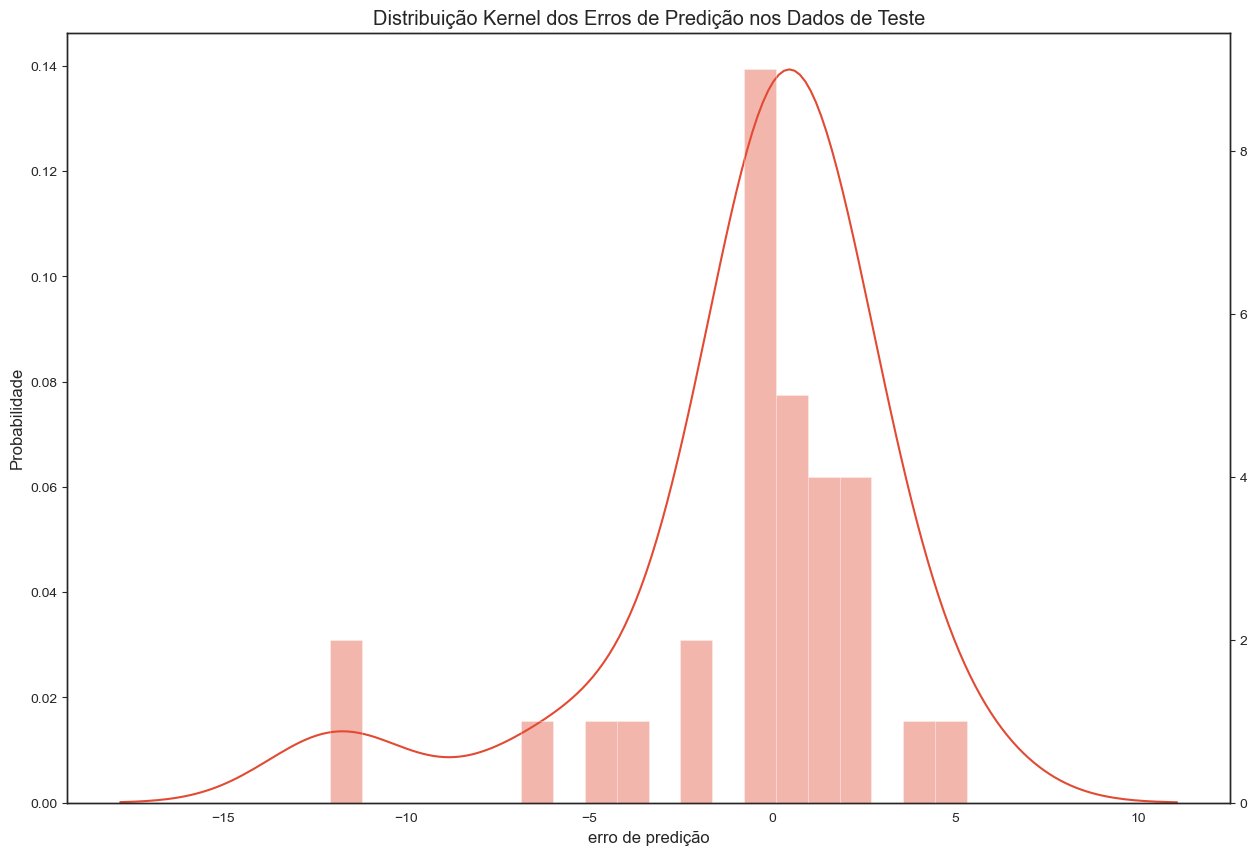

In [965]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(dfb["erro de predição"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(dfb["erro de predição"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos
g1.set_ylabel("Probabilidade")
g2.set_title("Distribuição Kernel dos Erros de Predição nos Dados de Teste")

plt.show()
